<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# importing

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [135]:
df=pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/Coronavirus-Tweet-Sentiment-Analysis/main/Coronavirus%20Tweets.csv',encoding='latin1')

In [136]:
df_og=df.copy()

# Functions

In [107]:
#Function to remove punctuations
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [108]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min")
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    try:
      # finding the best parameters of the model if any 
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('classification_report of training set')
  print("-"*80)
  print(classification_report(y_train,y_pred_train))
  print('classification_report of ttesting set')
  print("-"*80)
  print(classification_report(y_test,y_pred_test))
 



# Dataset inspection

In [7]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
# droping the id as it is not relavent
df=df.drop(['UserName','ScreenName','TweetAt','Location'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [10]:
#checking for missing values
df.isna().value_counts()

OriginalTweet  Sentiment
False          False        41157
dtype: int64

# univariate analysis

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

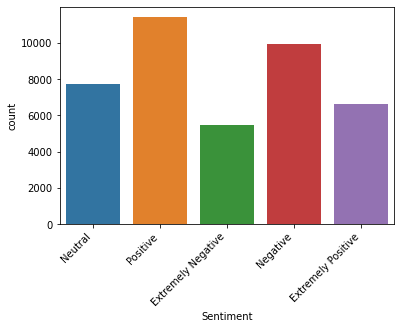

In [11]:
sns.countplot(x=df['Sentiment'])
plt.xticks(rotation=45,horizontalalignment='right')

In [90]:
list(df.Sentiment.value_counts().index)

['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

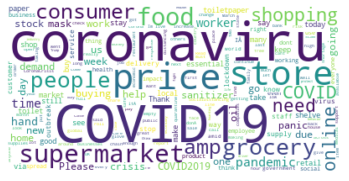

In [83]:
text = " ".join(cat for cat in df.tokenized_tweet)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data cleaing and wrangling

In [109]:
def remove (x):
  if x in ['Extremely Positive', 'Extremely Negative']:
    if x == 'Extremely Positive':
      x='Positive'
    else:
      x='Negative'
  return x


In [141]:
df.Sentiment=df.Sentiment.apply(lambda x: remove(x))

In [112]:
#Get rid of stop words and punctuations
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
import string
from nltk.corpus import stopwords

In [114]:
stopset=stopwords.words('english')

In [115]:
#Remove punctuations and special characters and stop words.
df['tokenized_tweet'] = df['OriginalTweet'].apply(text_process)

In [116]:
df['length']=df['OriginalTweet'].apply(len)

In [117]:
df=df.drop('OriginalTweet',axis=1)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.9)

In [119]:
X = df.drop(['Sentiment','length'],axis=1)
Y = df['Sentiment']

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [153]:
X_train = vectorizer.fit_transform(X_train.tokenized_tweet)
X_test = vectorizer.transform(X_test.tokenized_tweet)


In [122]:
X_train.shape

(30867, 69476)

In [123]:
y_train.shape

(30867,)

# SVM

In [53]:
from sklearn import svm
svc = svm.SVC()


In [54]:
train_and_score(svc, X_test, X_train, y_test, y_train)

KeyboardInterrupt: ignored

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'gama':[0,0.2,0.4,0.6,0.8,1]} 

In [52]:
grid = RandomizedSearchCV(svc, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='f1_micro') 

NameError: ignored

In [ ]:
grid.fit(train_vectorized,y_train)

# Logestic Regrestion

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
log_reg = LogisticRegression()

In [148]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [149]:
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='f1_micro') 

In [150]:
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished


ValueError: ignored

# Naive bayes cls

In [154]:
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()

In [155]:
train_and_score(nbc, X_test, X_train, y_test, y_train)

Training time: 0.0023min
classification_report of training set
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.84      0.89      0.87     11564
     Neutral       0.97      0.54      0.69      5812
    Positive       0.82      0.93      0.87     13491

    accuracy                           0.84     30867
   macro avg       0.88      0.79      0.81     30867
weighted avg       0.86      0.84      0.84     30867

classification_report of ttesting set
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.69      0.74      0.71      3834
     Neutral       0.81      0.14      0.24      1901
    Positive       0.65      0.83      0.73      4555

    accuracy                           0.67     10290
   macro avg       0.72      0.57      0.56     10290
weighted avg       0.69      0

In [156]:
param_dict = {'alpha': [0.001,0.01,0.1,1,10,100]} 

In [157]:
nbc_grid = GridSearchCV(nbc, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='f1_macro') 

In [158]:
train_and_score(nbc_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished


Training time: 0.0716min
The best parameters found out to be : {'alpha': 0.1}
 
where negative mean squared error is:  0.6372361507303181 

classification_report of training set
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.92      0.95      0.93     11564
     Neutral       0.96      0.87      0.91      5812
    Positive       0.93      0.95      0.94     13491

    accuracy                           0.93     30867
   macro avg       0.94      0.92      0.93     30867
weighted avg       0.93      0.93      0.93     30867

classification_report of ttesting set
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.66      0.73      0.69      3834
     Neutral       0.61      0.38      0.47      1901
    Positive       0.69      0.74      0.72      4555

    accuracy           